<a href="https://colab.research.google.com/github/bairidilipkumar/Analysis/blob/main/Sales_data_analysis_using_pandas_ans_sns.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt # visualizing data
%matplotlib inline
import seaborn as sns


In [2]:
data=pd.read_csv('/content/drive/MyDrive/ML/Sales Data.csv',encoding= 'unicode_escape')
data.head()

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0,NaN,NaN
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0,NaN,NaN
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0,NaN,NaN
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0,NaN,NaN
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0,NaN,NaN


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
 13  Status            0 non-null      float64
 14  unnamed1          0 non-null      float64
dtypes: float64(3), int64(4), object(8)
memory usage: 1.3+ MB


In [4]:
data.drop(['Status','unnamed1'],axis=1,inplace=True)

In [5]:
data.describe()

,User_ID,Age,Marital_Status,Orders,Amount
count,1.125100e+04,11251.000000,11251.000000,11251.000000,11239.000000
mean,1.003004e+06,35.421207,0.420318,2.489290,9453.610858
std,1.716125e+03,12.754122,0.493632,1.115047,5222.355869
min,1.000001e+06,12.000000,0.000000,1.000000,188.000000
25%,1.001492e+06,27.000000,0.000000,1.500000,5443.000000
50%,1.003065e+06,33.000000,0.000000,2.000000,8109.000000
75%,1.004430e+06,43.000000,1.000000,3.000000,12675.000000
max,1.006040e+06,92.000000,1.000000,4.000000,23952.000000


In [6]:
data.isnull().sum()

,0
User_ID,0
Cust_name,0
Product_ID,0
Gender,0
Age Group,0
Age,0
Marital_Status,0
State,0
Zone,0
Occupation,0


In [7]:
data.shape

(11251, 13)

In [8]:
data.dropna(inplace=True)

In [9]:
data.shape

(11239, 13)

<ipython-input-10-05f2281042f9>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  axis=sns.countplot(x='Gender',data=data,palette='Spectral')


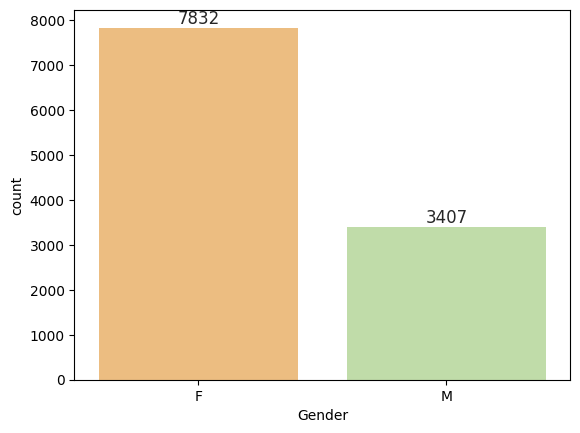

In [10]:
axis=sns.countplot(x='Gender',data=data,palette='Spectral')
sns.set(rc={'figure.figsize':(5,5)})
for bars in axis.containers:
  axis.bar_label(bars)

Age Group
26-35    4541
36-45    2283
18-25    1879
46-50     983
51-55     830
55+       427
0-17      296
Name: count, dtype: int64
Index(['0-17', '18-25', '26-35', '36-45', '46-50', '51-55', '55+'], dtype='object', name='Age Group')


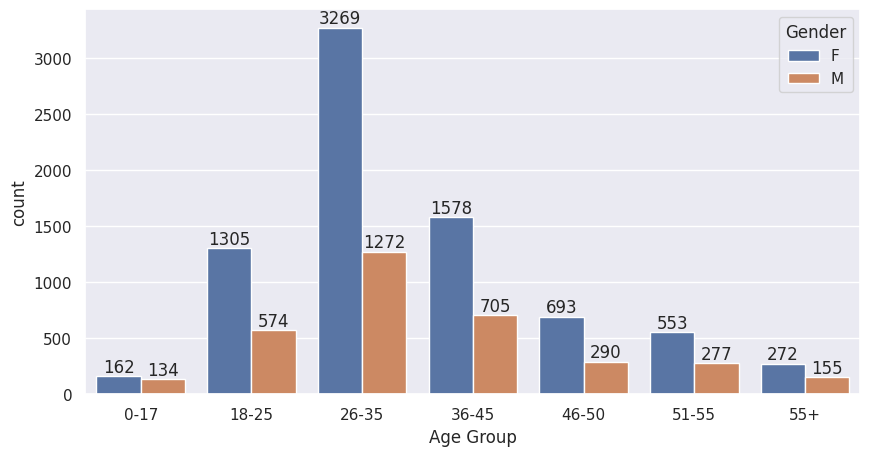

In [11]:
age_group_counts = data['Age Group'].value_counts()
print(age_group_counts)
sorted_age_groups = age_group_counts.index.sort_values()
print(sorted_age_groups)

sns.set(rc={'figure.figsize':(10,5)})
# Create the count plot
ax = sns.countplot(x='Age Group', data=data, order=sorted_age_groups,hue = 'Gender')

# Adding bar labels
for bars in ax.containers:
    ax.bar_label(bars)

# Show the plot
plt.xticks(rotation=0)  # Optional: Rotate x labels for better readability
plt.show()

  Age Group       Amount
2     26-35  42613443.94
3     36-45  22144995.49
1     18-25  17240732.00
4     46-50   9207844.00
5     51-55   8261477.00
6       55+   4080987.00
0      0-17   2699653.00


<Axes: xlabel='Age Group', ylabel='Amount'>

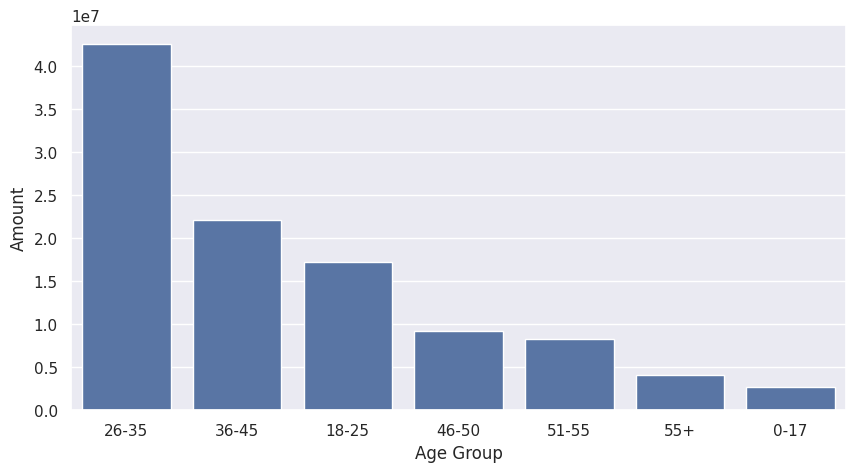

In [12]:
agg_data=data.groupby(['Age Group'],as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False)
sns.set(rc={'figure.figsize':(10,5)})
print(agg_data)
sns.barplot(x='Age Group',y='Amount',data=agg_data)

<Axes: xlabel='State', ylabel='Orders'>

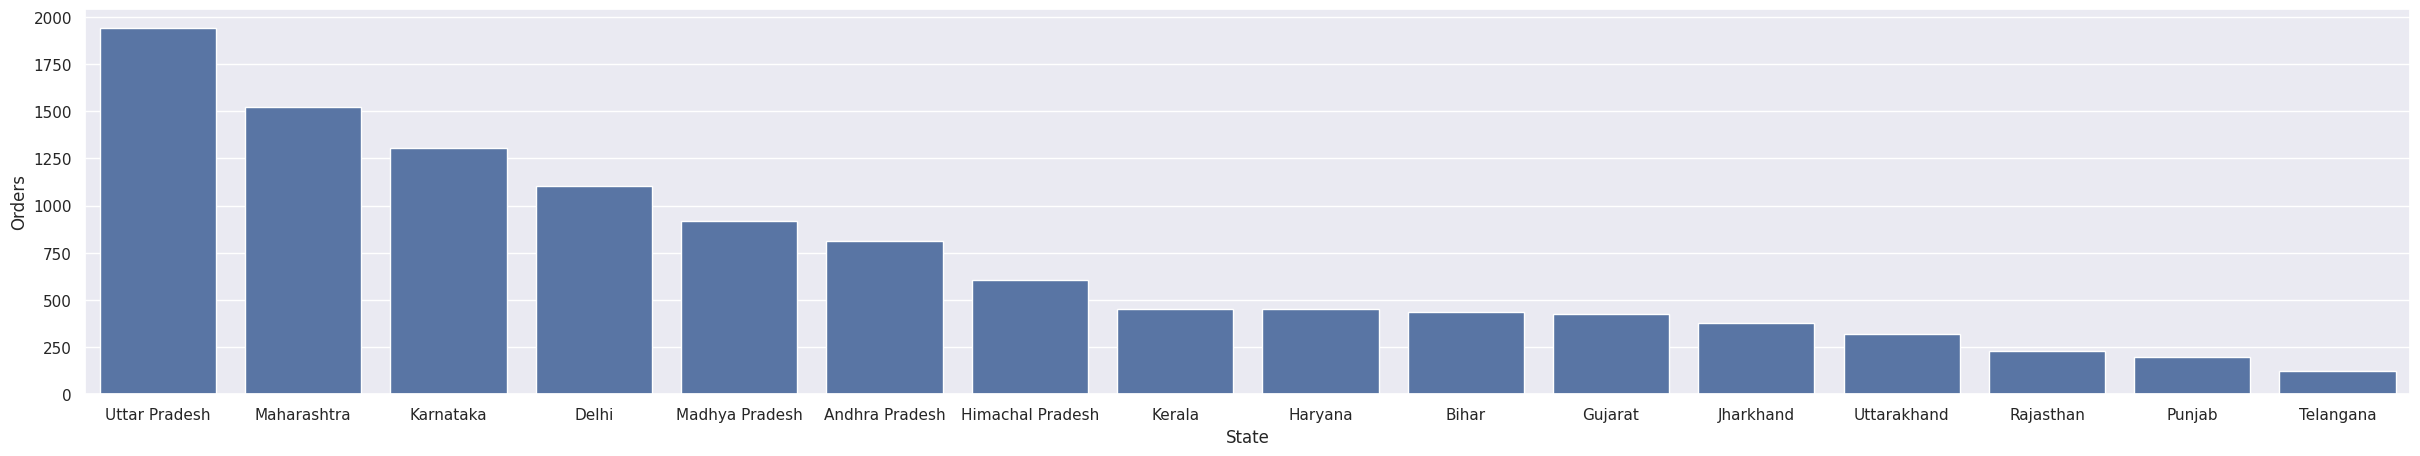

In [13]:
agg_state_data=data.groupby(['State'],as_index=False)['Orders'].count().sort_values(by='Orders',ascending=False)

sns.set(rc={'figure.figsize':(30,5)})
sns.barplot(x='State',y='Orders',data=agg_state_data)

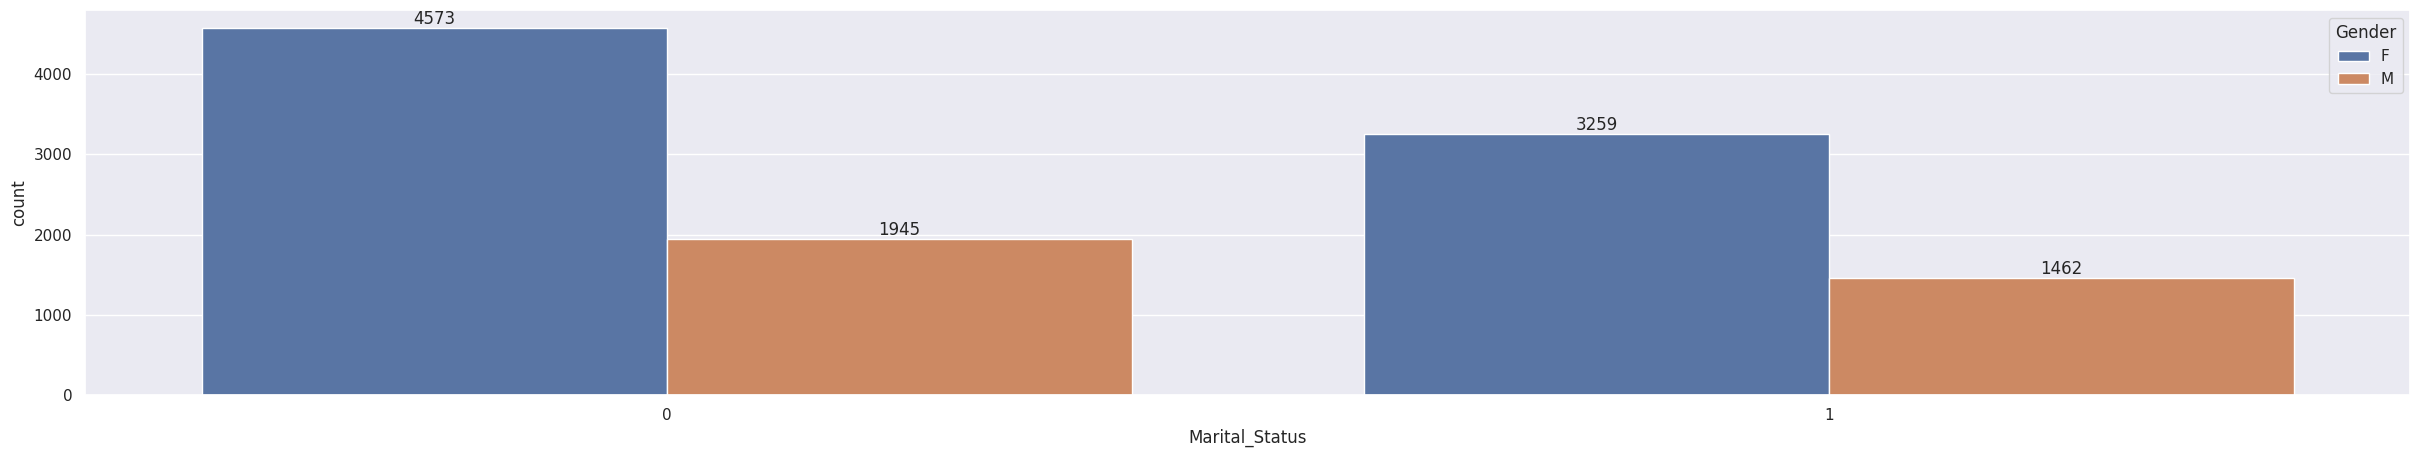

In [14]:
ax=sns.countplot(x='Marital_Status',data=data,hue='Gender')
sns.set(rc={'figure.figsize':(3,5)})
for bars in ax.containers:
  ax.bar_label(bars)

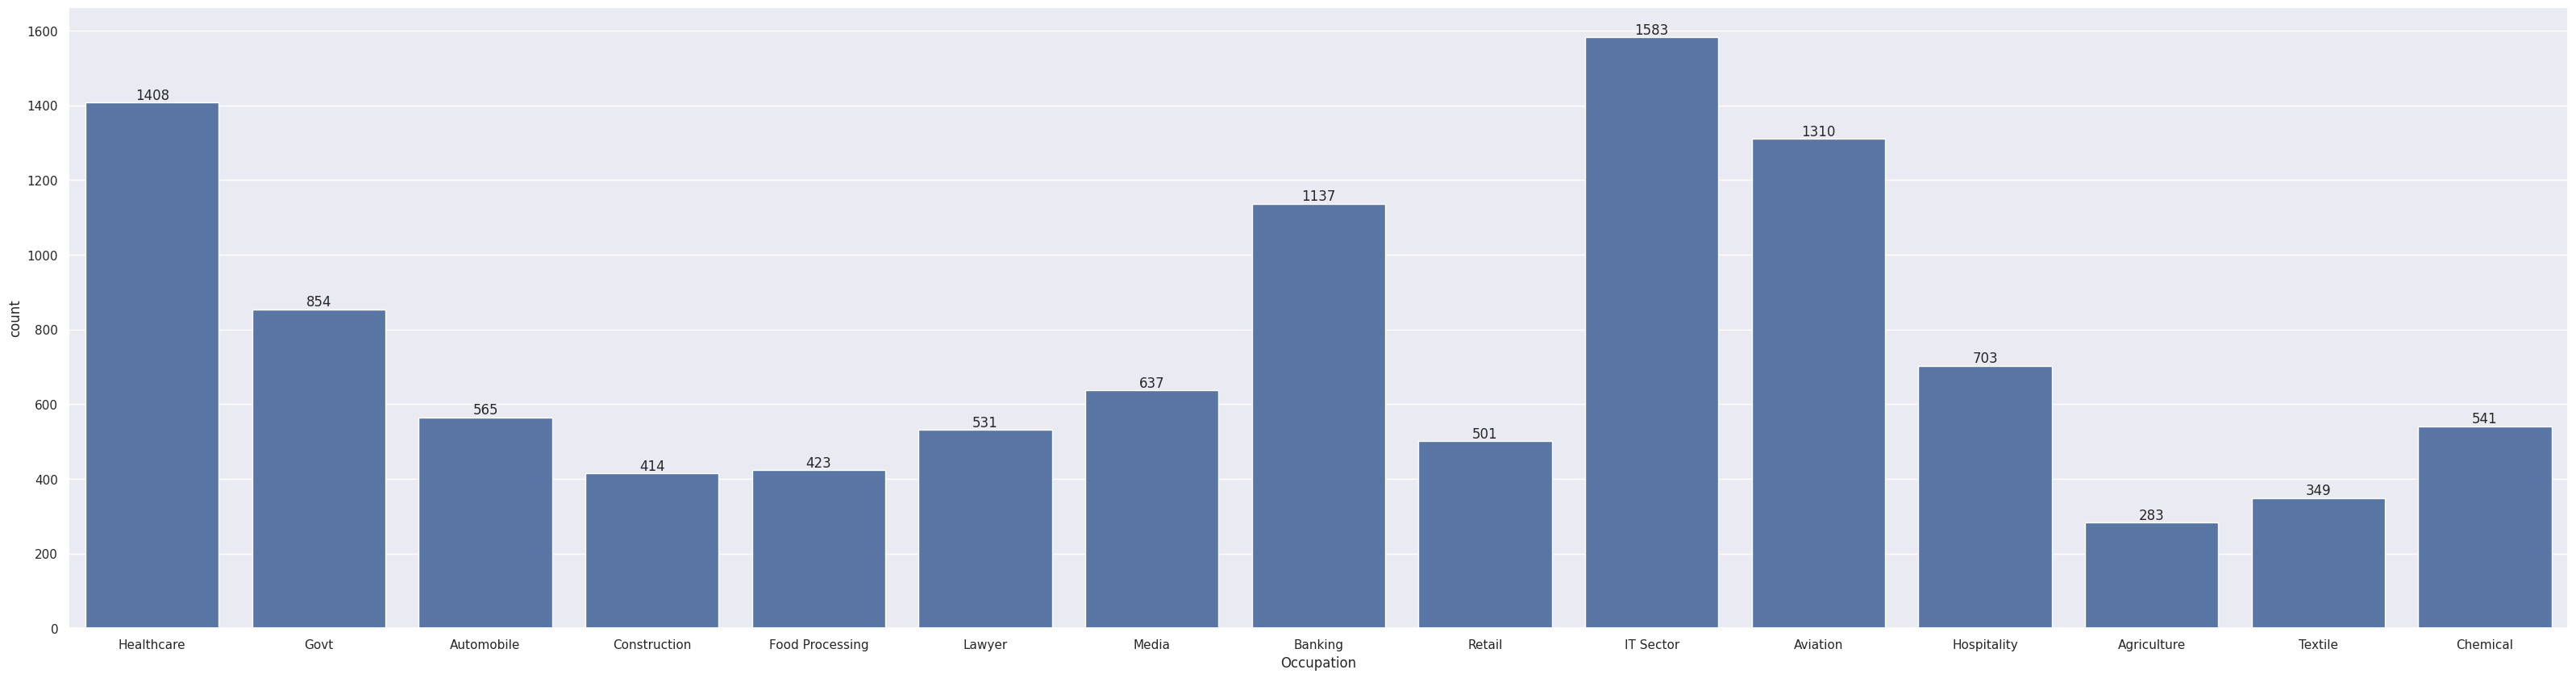

In [22]:
ax=sns.countplot(x='Occupation',data=data)
sns.set(rc={'figure.figsize':(50,10)})
for bars in ax.containers:
  ax.bar_label(bars)

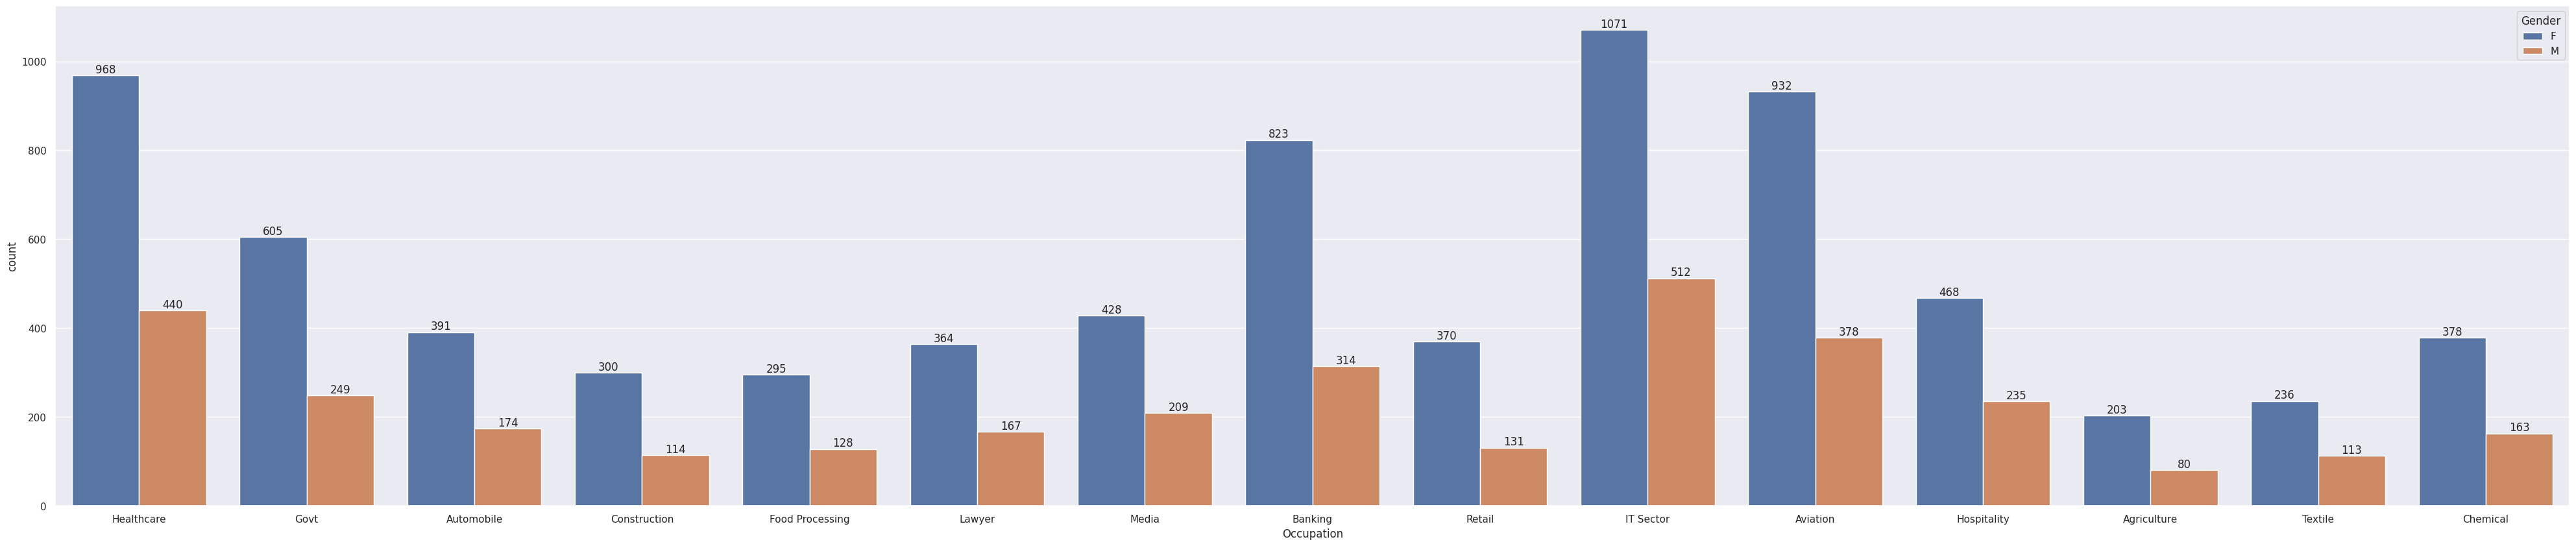

In [16]:
ax=sns.countplot(x='Occupation',data=data,hue='Gender')
sns.set(rc={'figure.figsize':(50,10)})
for bars in ax.containers:
  ax.bar_label(bars)

<ipython-input-17-d0d449cb578e>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Occupation',y='Amount_Sum',data=agg_sales_data,palette='RdBu')


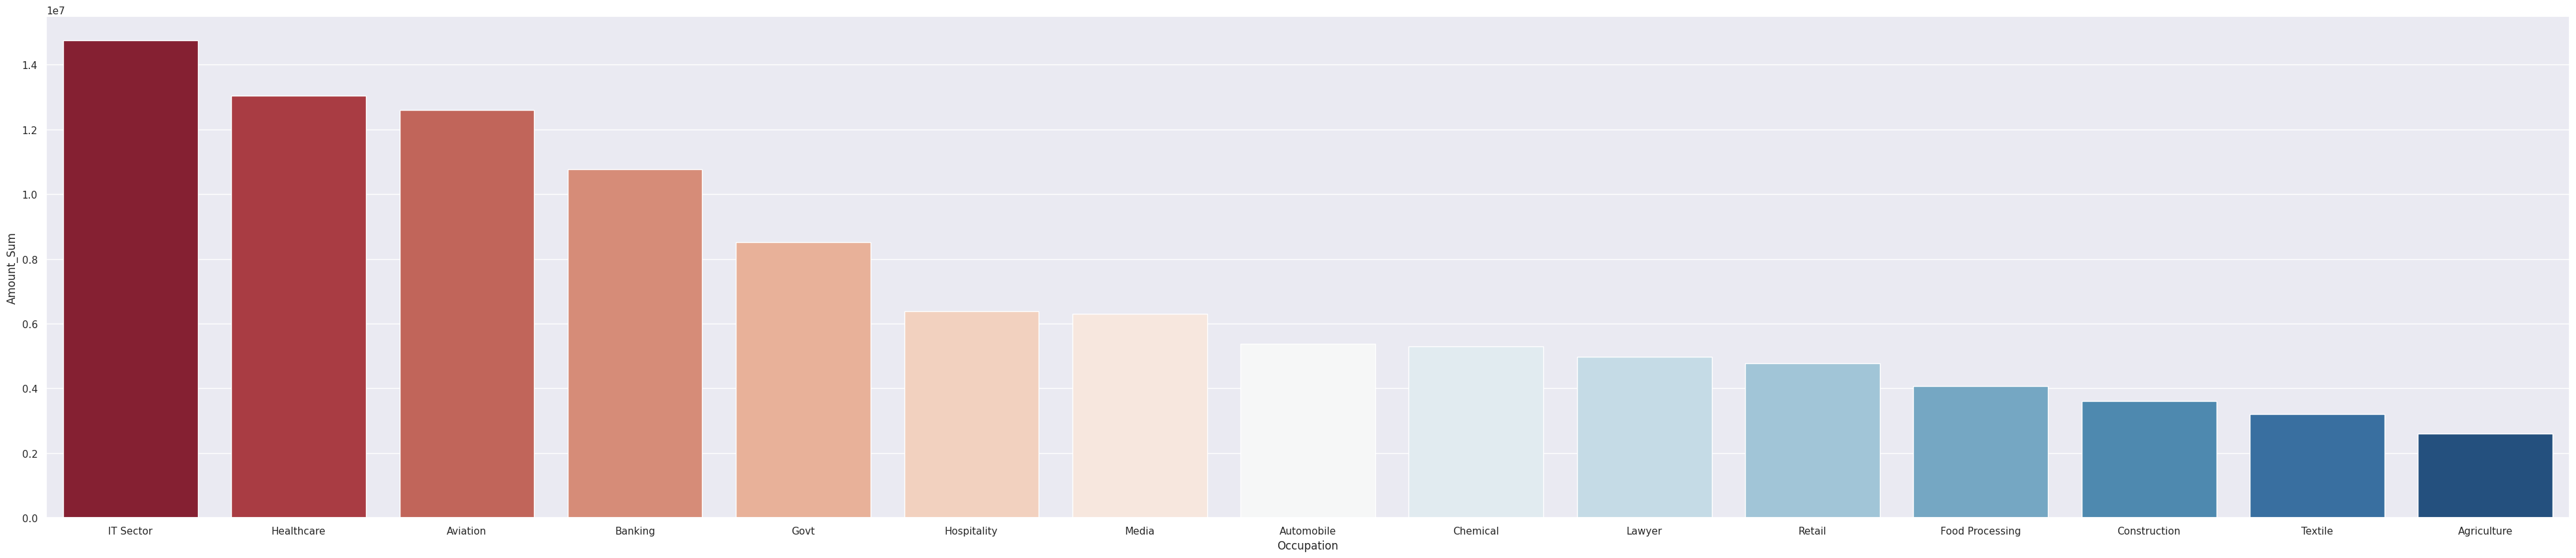

In [17]:
agg_sales_data = data.groupby('Occupation', as_index=False).agg(
    Amount_Sum=('Amount', 'sum')
).sort_values(by='Amount_Sum', ascending=False)
agg_sales_data
sns.barplot(x='Occupation',y='Amount_Sum',data=agg_sales_data,palette='RdBu')
sns.set(rc={'figure.figsize':(50,10)})

<ipython-input-18-5c0c991ff2af>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax=sns.countplot(data=data,x='Product_Category',palette='Greens')


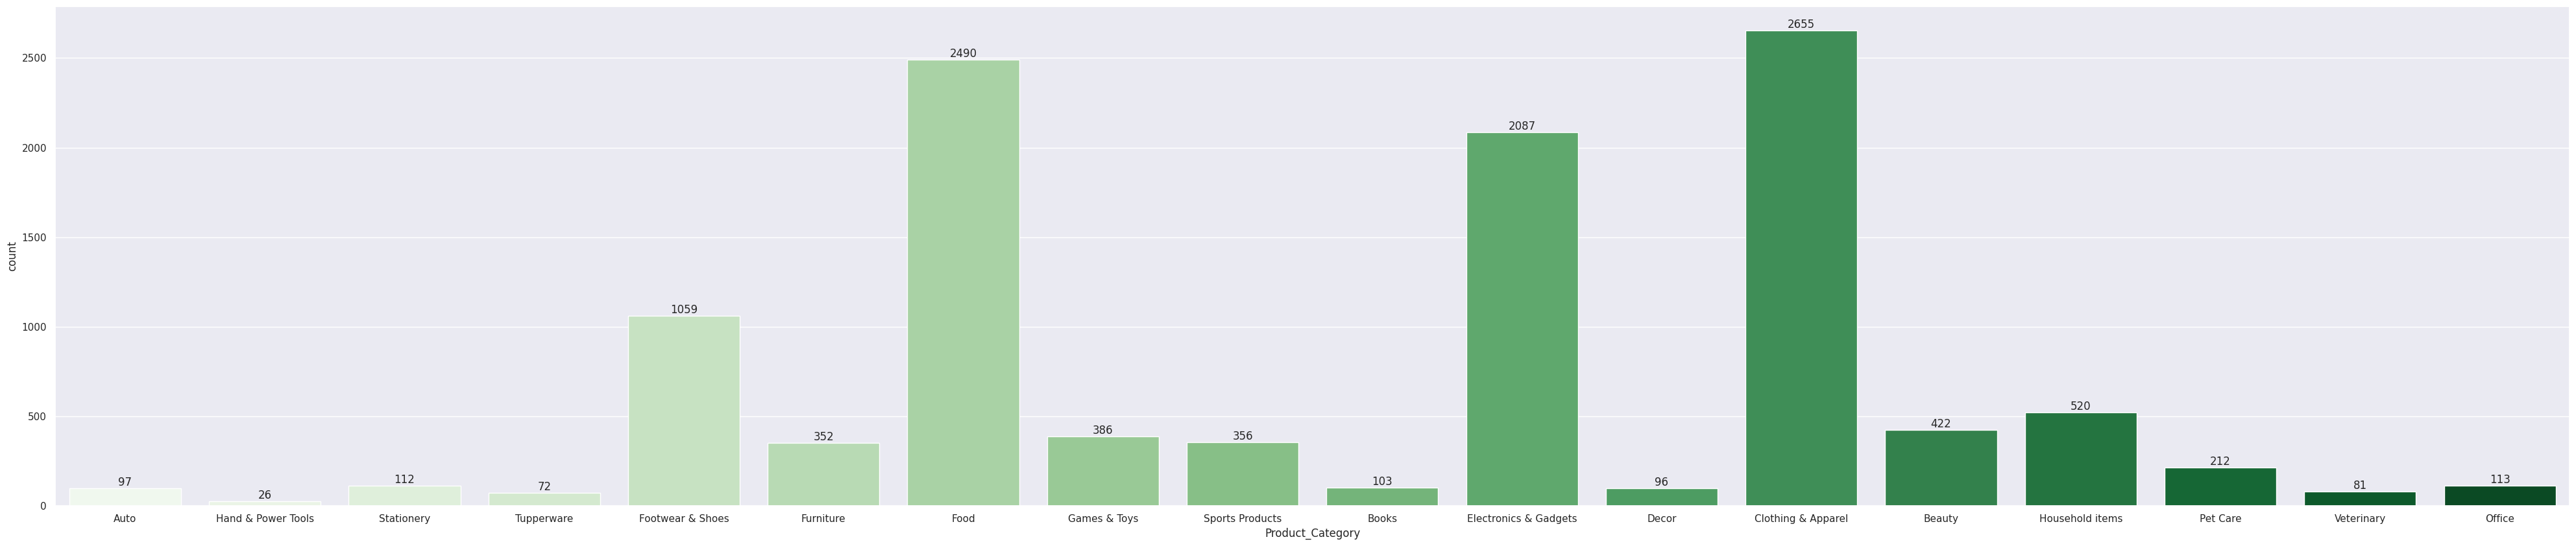

In [18]:

ax=sns.countplot(data=data,x='Product_Category',palette='Greens')
sns.set(rc={'figure.figsize':(40,10)})
for bars in ax.containers:
  ax.bar_label(bars)

<ipython-input-19-414fb025d283>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax=sns.countplot(data=state_data,x='Product_Category',palette='viridis')


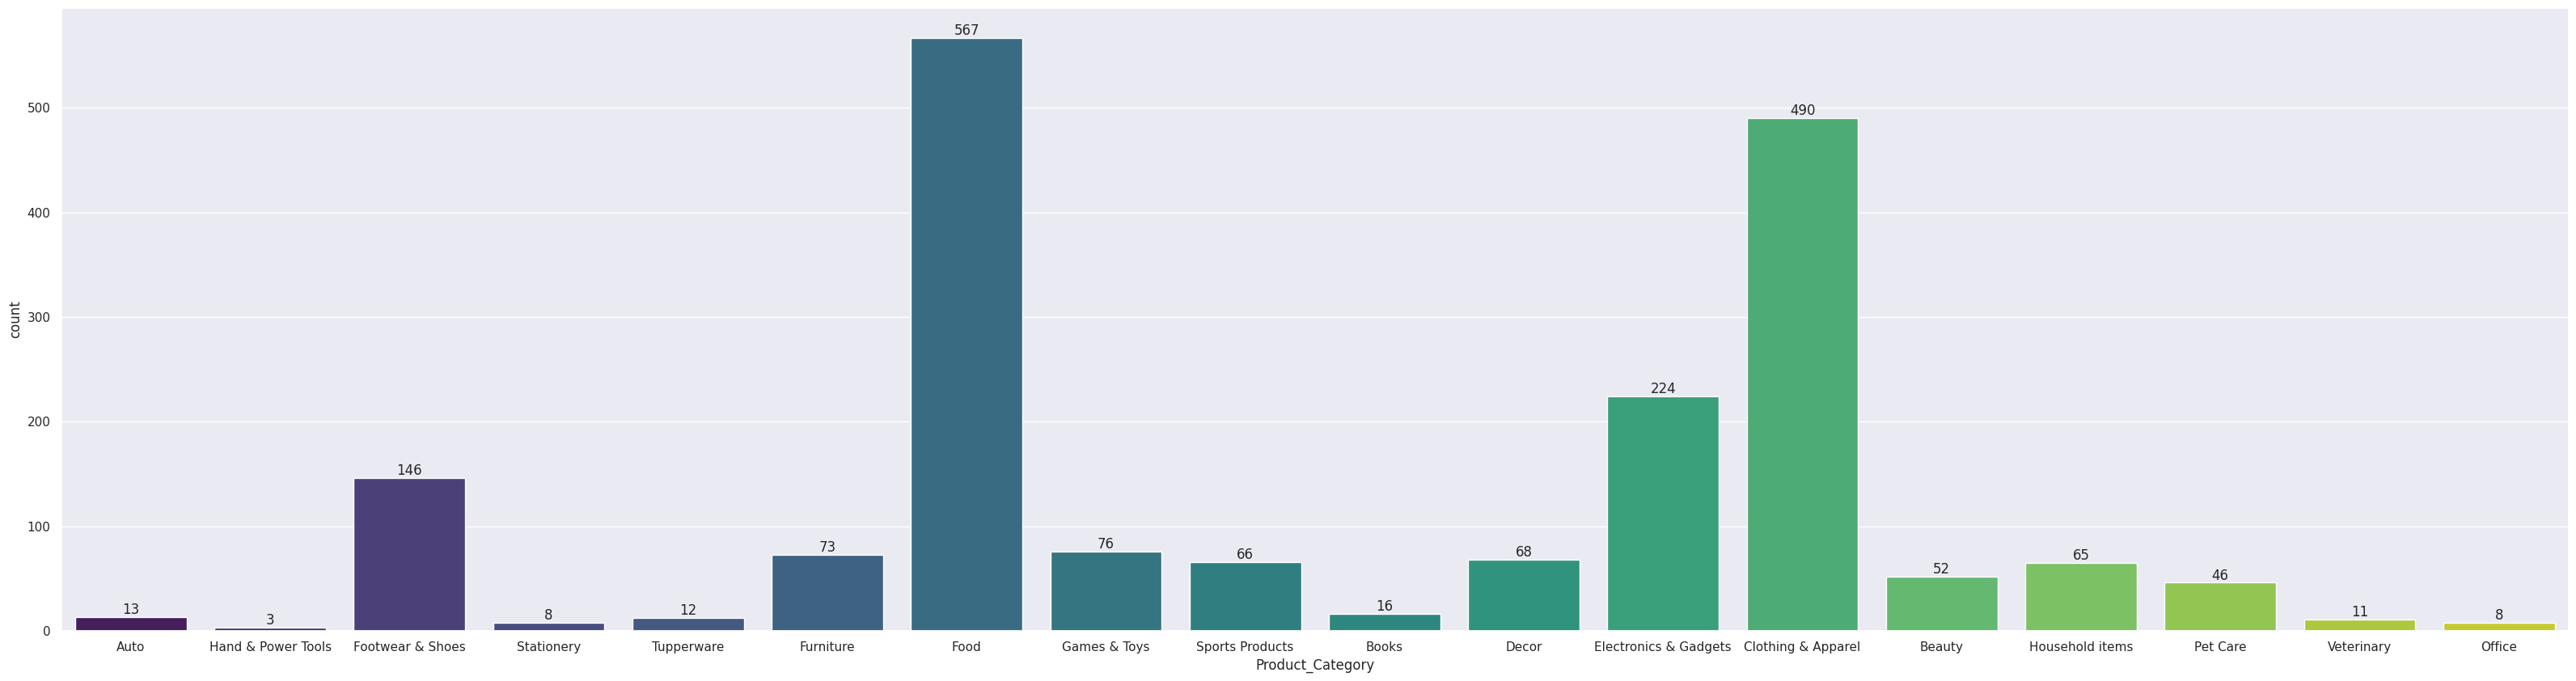

In [19]:
# Filter the DataFrame for the specific state
state_data = data[data['State'] == 'Uttar Pradesh']

ax=sns.countplot(data=state_data,x='Product_Category',palette='viridis')
sns.set(rc={'figure.figsize':(40,10)})
for bars in ax.containers:
  ax.bar_label(bars)

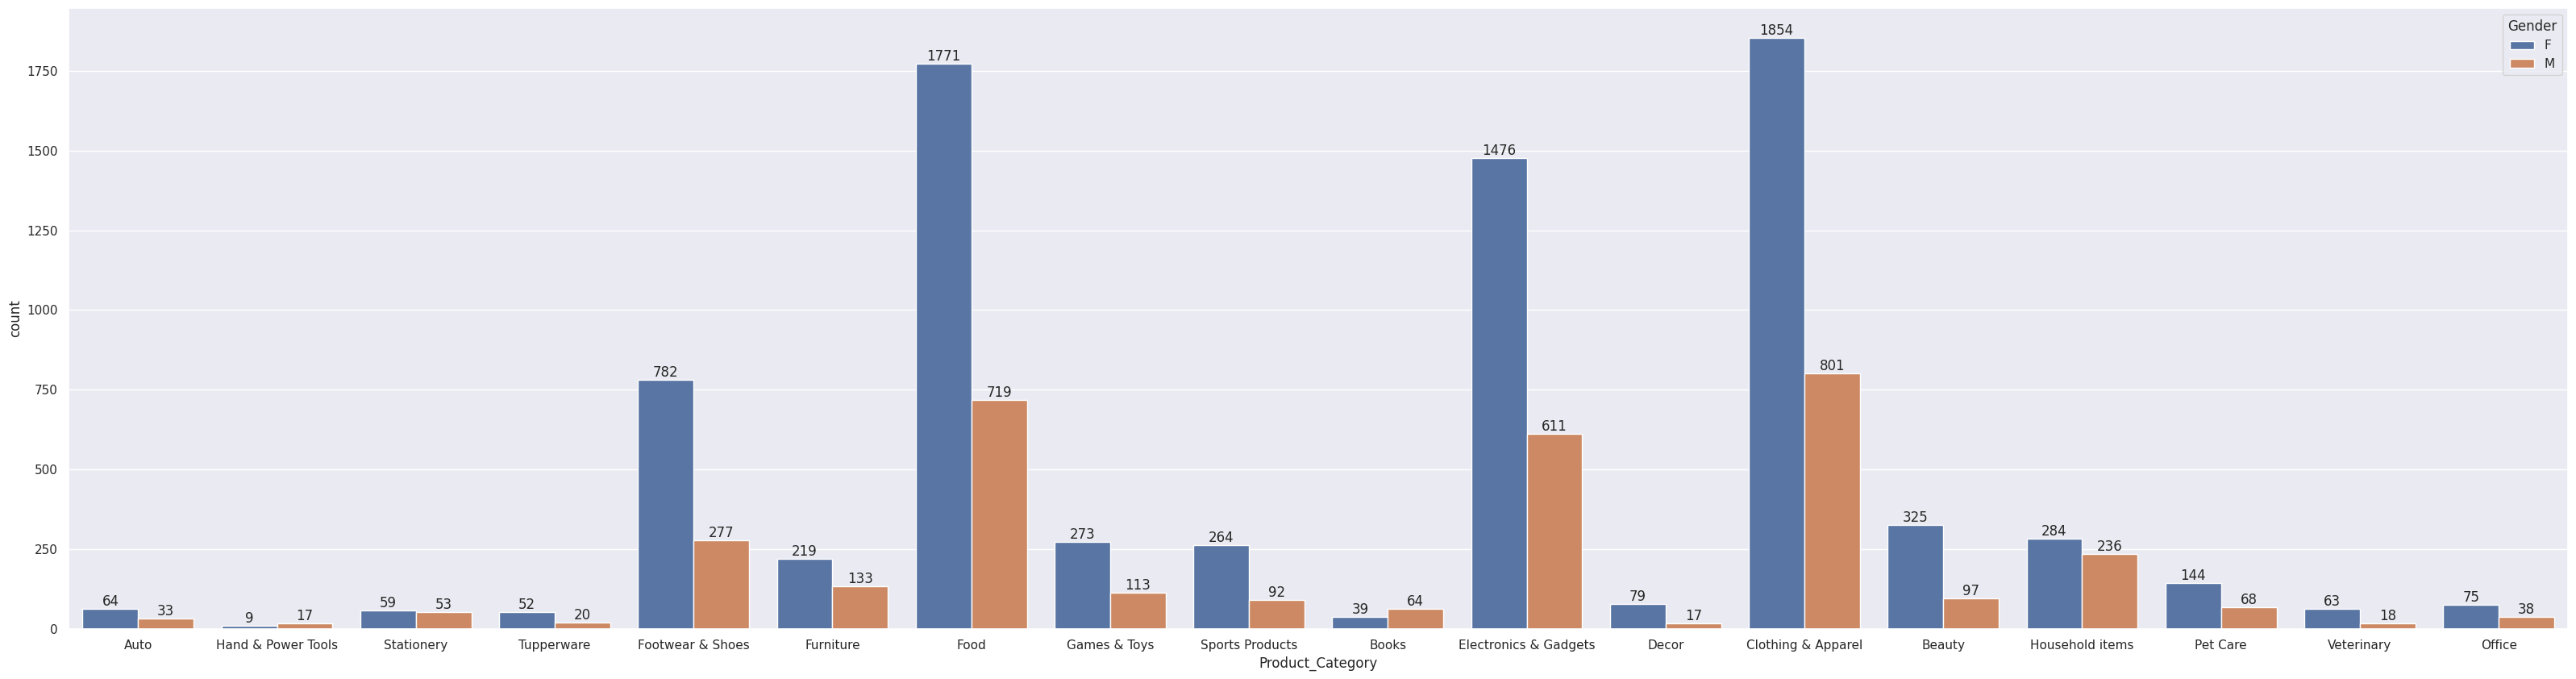

In [20]:
ax=sns.countplot(data=data,x='Product_Category',hue='Gender')
sns.set(rc={'figure.figsize':(40,10)})
for bars in ax.containers:
  ax.bar_label(bars)

In [21]:
agg_sales_data1 = data.groupby(['Occupation'], as_index=False).agg(
    Amount_Sum=('Amount', 'sum'),
    Amount_Count=('Amount', 'count')
).sort_values(by='Amount_Sum', ascending=False)

agg_sales_data1

,Occupation,Amount_Sum,Amount_Count
10,IT Sector,14755079.00,1583
8,Healthcare,13034587.49,1408
2,Aviation,12602298.00,1310
3,Banking,10770610.95,1137
7,Govt,8517212.00,854
9,Hospitality,6376405.00,703
12,Media,6295832.99,637
1,Automobile,5368596.00,565
4,Chemical,5297436.00,541
11,Lawyer,4981665.00,531
